In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
from lid_driven_cavity import states, operators, postprocessing

In [10]:
def test_function(x, y):
    return np.sin(4*np.pi*x)*(1.0+np.exp(y))

def test_function_gradx(x, y):
    return 4*np.pi*np.cos(4*np.pi*x)*(1.0+np.exp(y))

def test_function_grady(x, y):
    return np.sin(4*np.pi*x)*np.exp(y)

In [11]:
Ns = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
errors_x, errors_y = [], []
for N in Ns:

    # Set up domain
    Nx, Ny = N, N
    x = np.linspace(0.0, 1.0, Ny)
    y = np.linspace(0.0, 1.0, Nx)
    y = np.flip(y)
    xx, yy = np.meshgrid(x,y)

    # Numerical solution
    zz = test_function(xx, yy)
    gradient_numerical_x = operators.compute_gradient_x(states.State(zz, Nx=Nx, Ny=Ny))
    gradient_numerical_y = operators.compute_gradient_y(states.State(zz, Nx=Nx, Ny=Ny))

    # Analytical solution
    gradient_analytical_x = states.State(test_function_gradx(xx, yy), Nx, Ny)
    gradient_analytical_y = states.State(test_function_grady(xx, yy), Nx, Ny)

    # Interior points only
    gradient_analytical_x.strip_boundaries()
    gradient_numerical_x.strip_boundaries()
    gradient_analytical_y.strip_boundaries()
    gradient_numerical_y.strip_boundaries()

    # Error convergence rate
    errors_x.append(postprocessing.relative_frobenius_error(gradient_numerical_x.get_matrix(), gradient_analytical_x.get_matrix()))
    errors_y.append(postprocessing.relative_frobenius_error(gradient_numerical_y.get_matrix(), gradient_analytical_y.get_matrix()))

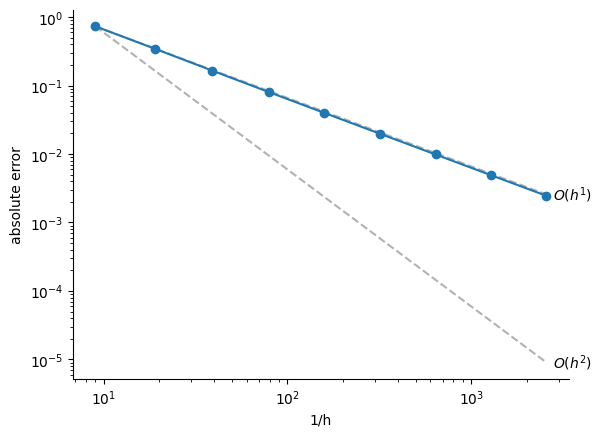

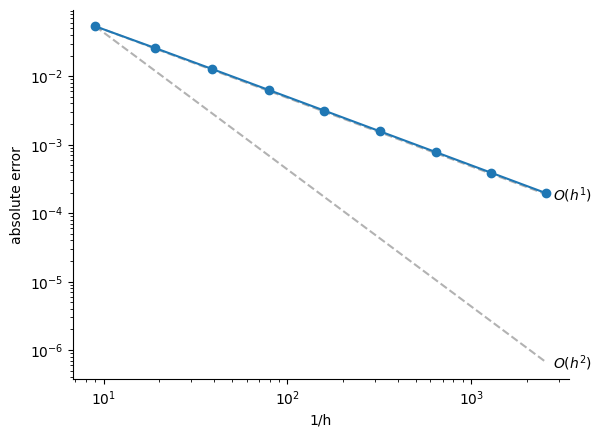

In [12]:
postprocessing.plot_convergence(1.0/(np.array(Ns)-1.0), errors_x, [1, 2])
postprocessing.plot_convergence(1.0/(np.array(Ns)-1.0), errors_y, [1, 2])

In [13]:
Ns = [10, 20, 40, 80, 160, 320, 640, 1280, 2560]
errors_x, errors_y = [], []
for N in Ns:

    # Set up domain
    Nx, Ny = N, N
    x = np.linspace(0.0, 1.0, Ny)
    y = np.linspace(0.0, 1.0, Nx)
    y = np.flip(y)
    xx, yy = np.meshgrid(x,y)

    # Numerical solution
    zz = test_function(xx, yy)
    gradient_numerical_x = operators.compute_gradient_x_centered(states.State(zz, Nx=Nx, Ny=Ny))
    gradient_numerical_y = operators.compute_gradient_y_centered(states.State(zz, Nx=Nx, Ny=Ny))

    # Analytical solution
    gradient_analytical_x = states.State(test_function_gradx(xx, yy), Nx, Ny)
    gradient_analytical_y = states.State(test_function_grady(xx, yy), Nx, Ny)

    # Interior points only
    gradient_analytical_x.strip_boundaries()
    gradient_numerical_x.strip_boundaries()
    gradient_analytical_y.strip_boundaries()
    gradient_numerical_y.strip_boundaries()

    # Error convergence rate
    errors_x.append(postprocessing.relative_frobenius_error(gradient_numerical_x.get_matrix(), gradient_analytical_x.get_matrix()))
    errors_y.append(postprocessing.relative_frobenius_error(gradient_numerical_y.get_matrix(), gradient_analytical_y.get_matrix()))

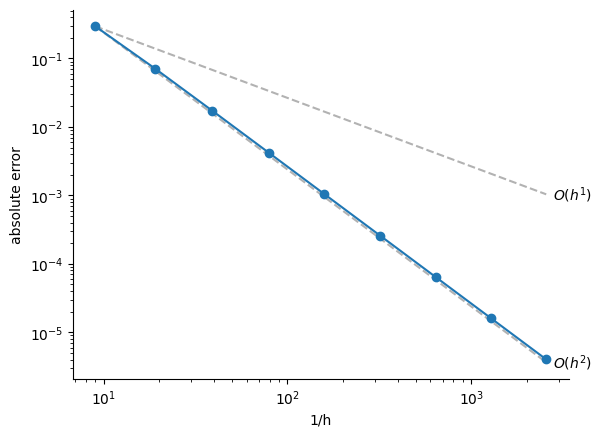

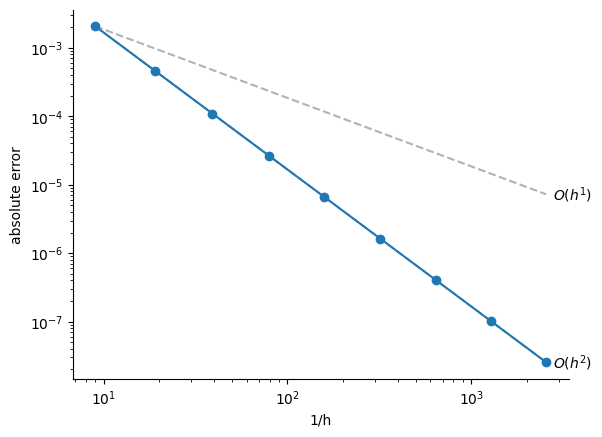

In [14]:
postprocessing.plot_convergence(1.0/(np.array(Ns)-1.0), errors_x, [1, 2])
postprocessing.plot_convergence(1.0/(np.array(Ns)-1.0), errors_y, [1, 2])